<a href="https://colab.research.google.com/github/arjunsai918/Intro_to_ML/blob/main/Assignment_3_Arjun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Arjun sai Sirasawada  Student ID : 801454914

In [1]:
# Load essential libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
breast = load_breast_cancer()
X = breast.data
print(X.shape)  # Display dataset dimensions
Y = breast.target

# Convert the data to a pandas DataFrame and preview the top records
breast_df = pd.DataFrame(X)
breast_df.head()


(569, 30)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Problem 1(i)

In [2]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load breast cancer dataset
breast = load_breast_cancer()
X = breast.data
Y = breast.target

# Convert the dataset to a DataFrame for easier handling
breast_df = pd.DataFrame(X)

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(breast_df)

# Divide data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


=== Logistic Regression (No Regularization Applied) ===
Accuracy Score: 0.9385964912280702
Precision Score: 0.9705882352941176
Recall Score: 0.9295774647887324


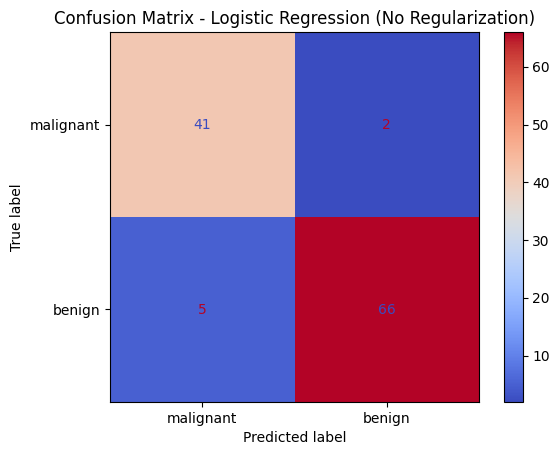

In [4]:
# Train logistic regression model without applying any regularization
logreg_model = LogisticRegression(penalty=None, solver='lbfgs', max_iter=10000)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Display evaluation metrics
print("=== Logistic Regression (No Regularization Applied) ===")
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))

# Generate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
matrix_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=breast.target_names)
matrix_display.plot(cmap="coolwarm")  # Changed from 'Blues' to 'coolwarm'
plt.title("Confusion Matrix - Logistic Regression (No Regularization)")
plt.show()


Problem 1(ii)

=== Logistic Regression with L2 Regularization ===
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


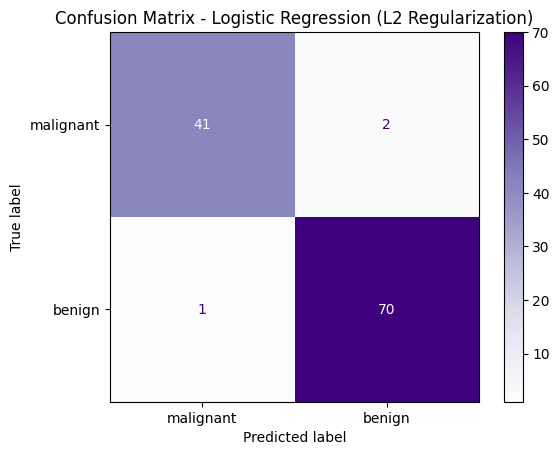

In [5]:
# Train logistic regression using L2 regularization
l2_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)
l2_model.fit(X_train, y_train)

# Perform prediction on the test set
l2_predictions = l2_model.predict(X_test)

# Display performance metrics
print("=== Logistic Regression with L2 Regularization ===")
print("Accuracy:", accuracy_score(y_test, l2_predictions))
print("Precision:", precision_score(y_test, l2_predictions))
print("Recall:", recall_score(y_test, l2_predictions))

# Generate and visualize the confusion matrix using a new color map
l2_conf_matrix = confusion_matrix(y_test, l2_predictions)
l2_display = ConfusionMatrixDisplay(confusion_matrix=l2_conf_matrix, display_labels=breast.target_names)
l2_display.plot(cmap="Purples")  # Changed from 'Greens' to 'Purples'
plt.title("Confusion Matrix - Logistic Regression (L2 Regularization)")
plt.show()


Problem 2(i) & (ii):

=== Naive Bayes Classifier ===
Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465
F1 Score: 0.9722222222222222


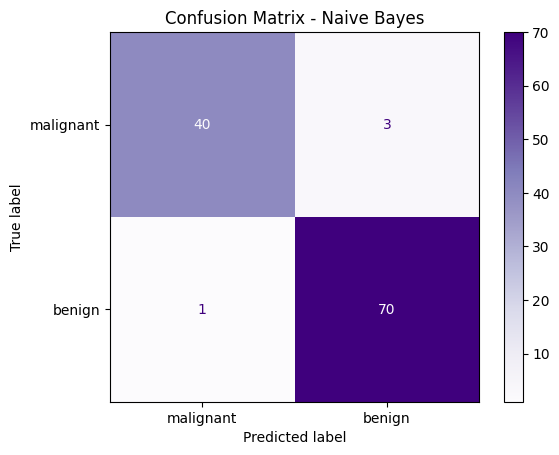


=== Logistic Regression (L2 Penalty) ===
Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465
F1 Score: 0.9790209790209791


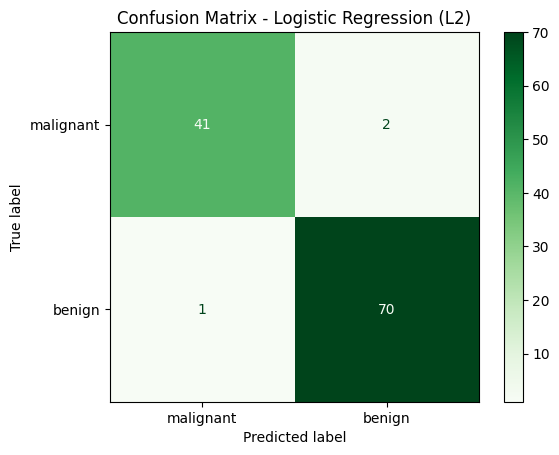

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load cancer dataset
breast = load_breast_cancer()
X = breast.data
Y = breast.target

# Convert to DataFrame
breast_input = pd.DataFrame(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(breast_input)

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate Naive Bayes
y_pred_nb = nb_model.predict(X_test)
print("=== Naive Bayes Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=breast.target_names)
disp_nb.plot(cmap="Purples")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Logistic Regression with L2 penalty (for comparison)
model_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

# Compare metrics
print("\n=== Logistic Regression (L2 Penalty) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_l2))
print("Precision:", precision_score(y_test, y_pred_l2))
print("Recall:", recall_score(y_test, y_pred_l2))
print("F1 Score:", f1_score(y_test, y_pred_l2))

# Confusion Matrix for Logistic Regression
cm_l2 = confusion_matrix(y_test, y_pred_l2)
disp_l2 = ConfusionMatrixDisplay(confusion_matrix=cm_l2, display_labels=breast.target_names)
disp_l2.plot(cmap="Greens")
plt.title("Confusion Matrix - Logistic Regression (L2)")
plt.show()


Problem 3(i):

In [10]:
# Import necessary modules
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create a DataFrame from the input features
df_input = pd.DataFrame(X)

# Normalize the features using standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_input)

# Divide the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build and train a Support Vector Machine with a linear kernel and regularization parameter C=1.0
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

Problem 3(ii)

=== Support Vector Machine (Linear Kernel, C=1.0) ===
Accuracy Score: 0.956140350877193
Precision Score: 0.9714285714285714
Recall Score: 0.9577464788732394
F1 Score: 0.9645390070921985


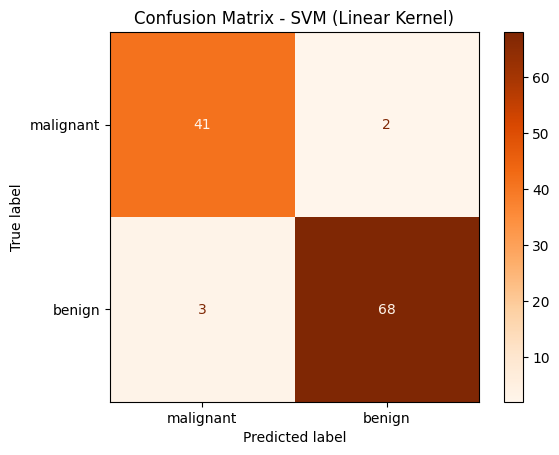

In [11]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Generate predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Output evaluation metrics
print("=== Support Vector Machine (Linear Kernel, C=1.0) ===")
print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("Precision Score:", precision_score(y_test, y_pred_svm))
print("Recall Score:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))

# Create and plot the confusion matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=data.target_names)
svm_disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()


Problem 4(i):

In [12]:
# Import necessary modules for data loading, preprocessing, and modeling
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Normalize the feature set using standard scaling (essential for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the standardized data into training and testing sets (80% train, 20% test)
X_train_full, X_test_full, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [13]:
# Evaluate Logistic Regression performance across different PCA component sizes (K = 1 to 30)
results = []

for k in range(1, X.shape[1] + 1):  # Iterate through K = 1 to 30
    # Reduce dimensionality using PCA with k components
    pca = PCA(n_components=k)
    X_train = pca.fit_transform(X_train_full)
    X_test = pca.transform(X_test_full)

    # Initialize and train logistic regression model
    model = LogisticRegression(solver='lbfgs', max_iter=10000)
    model.fit(X_train, y_train)

    # Generate predictions and capture evaluation metrics
    y_pred = model.predict(X_test)
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    results.append({
        'PCA Components (K)': k,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })


Problem 4(ii):

Available columns: Index(['PCA Components (K)', 'Accuracy', 'Precision', 'Recall', 'F1 Score'], dtype='object')
Optimal Number of PCA Components (K): 2
PCA Components (K)    2.000000
Accuracy              0.991228
Precision             0.986111
Recall                1.000000
F1 Score              0.993007
Name: 1, dtype: float64


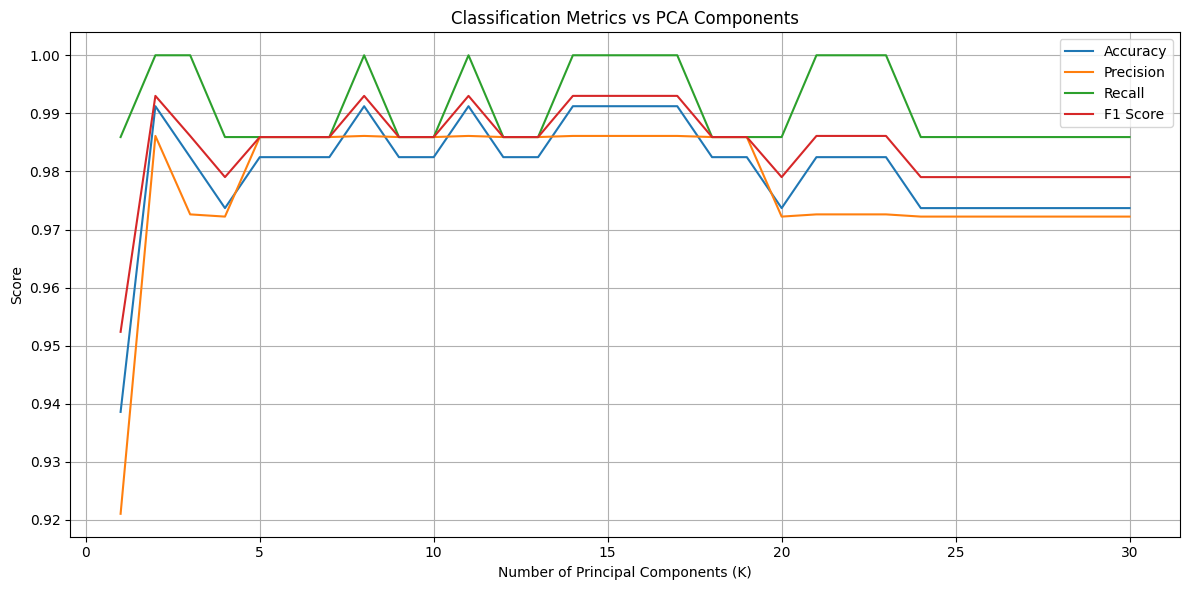

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print available columns to verify
print("Available columns:", results_df.columns)

# Find the K with highest accuracy
best_k = results_df.loc[results_df['Accuracy'].idxmax()]
optimal_k = int(results_df.loc[results_df['Accuracy'].idxmax(), 'PCA Components (K)'])

print("Optimal Number of PCA Components (K):", optimal_k)
print(best_k)

# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(results_df['PCA Components (K)'], results_df['Accuracy'], label='Accuracy')
plt.plot(results_df['PCA Components (K)'], results_df['Precision'], label='Precision')
plt.plot(results_df['PCA Components (K)'], results_df['Recall'], label='Recall')
plt.plot(results_df['PCA Components (K)'], results_df['F1 Score'], label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Classification Metrics vs PCA Components')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
